In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#to print all the interactive output without resorting to print, not only the last result.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [2]:
data = pd.read_excel("../input/jumlah-penduduk/Jumlah Penduduk Hasil Proyeksi Menurut Provinsi dan Jenis Kelamin New.xlsx")

print(f"head: \n{data.head(5)}\n")
print(f"Tail: \n {data.tail()} \n")
print(f"Describe data: \n{data.describe()}\n")
print(f"Info: \n{data.info()}\n")

head: 
         Provinsi    2020    2019    2018  2020.1  2019.1  2018.1   2020.2  \
0            ACEH  2691.8  2656.1  2619.9  2696.3  2660.2  2623.5   5388.1   
1  SUMATERA UTARA  7392.7  7312.2  7229.4  7405.7  7327.2  7246.5  14798.4   
2  SUMATERA BARAT  2760.6  2727.0  2692.6  2785.1  2752.5  2719.3   5545.7   
3            RIAU  3553.2  3497.0  3440.0  3398.0  3338.1  3277.6   6951.2   
4           JAMBI  1831.3  1813.5  1795.2  1772.9  1752.7  1731.9   3604.2   

    2019.2   2018.2  
0   5316.3   5243.4  
1  14639.4  14476.0  
2   5479.5   5411.8  
3   6835.1   6717.6  
4   3566.2   3527.1  

Tail: 
           Provinsi    2020    2019    2018  2020.1  2019.1  2018.1  2020.2  \
29  SULAWESI BARAT   692.2   682.8   673.3   686.0   676.4   666.8  1378.1   
30          MALUKU   900.4   891.4   882.2   886.7   877.1   867.3  1787.1   
31    MALUKU UTARA   637.3   629.3   621.2   615.0   606.3   597.5  1252.3   
32     PAPUA BARAT   518.1   506.4   494.9   468.0   457.2   446.5   98

In [3]:
data_x = data.iloc[:, 1:7]
data_x.head()

,2020,2019,2018,2020.1,2019.1,2018.1
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9


In [4]:
scr=[]

for i in range (1, 35):
    score = KMeans(n_clusters=i).fit(data_x).score(data_x)
    print(score)
    scr.append(score)

-6172795600.199117
-714731770.2363442
-314183676.7469047
-171959937.15523815
-97643389.2876923
-53607495.24169231
-33351370.006692305
-19331005.455888886
-13795110.19523809
-9677143.626904758
-6824102.089749998
-3814922.844238095
-2624003.0348333325
-1747973.2214999998
-1293782.0948333328
-1052951.2831666663
-842207.4639999999
-658838.0206666664
-456516.18333333323
-342911.1533333333
-278621.7483333333
-218793.14833333326
-164765.63833333328
-129487.24333333329
-98123.40833333328
-71349.47833333332
-50042.81999999999
-33785.28499999997
-26043.01499999997
-18527.579999999958
-11033.439999999957
-9662.370000000026
-3631.3500000000145
-2.116419145399348e-24


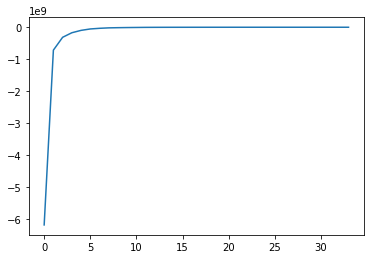

In [5]:
plt.plot(scr)

In [6]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(data_x)

KMeans(n_clusters=5)

In [7]:
data_x["Cluster"] = kmeans.labels_
data_x

,2020,2019,2018,2020.1,2019.1,2018.1,Cluster
0,2691.8,2656.1,2619.9,2696.3,2660.2,2623.5,1
1,7392.7,7312.2,7229.4,7405.7,7327.2,7246.5,4
2,2760.6,2727.0,2692.6,2785.1,2752.5,2719.3,1
3,3553.2,3497.0,3440.0,3398.0,3338.1,3277.6,1
4,1831.3,1813.5,1795.2,1772.9,1752.7,1731.9,1
5,4358.0,4308.1,4257.1,4242.8,4189.1,4134.4,4
6,1015.2,1004.5,993.6,979.1,967.2,955.0,3
7,4364.3,4327.8,4289.9,4170.6,4129.8,4087.8,4
8,756.9,748.5,739.9,712.9,702.6,692.1,3
9,1179.0,1144.7,1111.0,1130.5,1096.9,1063.8,3


(array([ 2.,  0., 12.,  0.,  0.,  1.,  0., 13.,  0.,  6.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

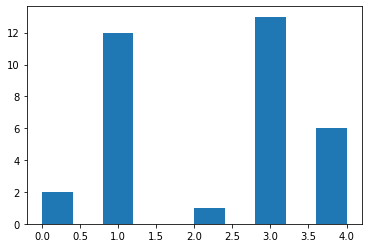

In [8]:
plt.hist(data_x["Cluster"])

In [ ]:
sns.pairplot(data_x, hue="Cluster")